In [58]:
import pandas as pd

In [59]:
caminho_notas = "bases/bases_limpas/base_vendas_limpas.xlsx"
base_notas = pd.read_excel(caminho_notas)
base_notas["Data da venda"] = pd.to_datetime(base_notas["Data da venda"])

C:\Users\Paulo Neto\AppData\Local\Temp\ipykernel_7588\991813996.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  base_notas["Data da venda"] = pd.to_datetime(base_notas["Data da venda"])


In [60]:
base_notas.head(3)

,Numero nota fiscal,Data da venda,Código produto,Descrição do produto,Quantidade do produto,Valor unitário,Preço venda,Preço de custo,Valor da nota
0,566082,2025-06-17,33932,ENV 229X324 OU C/100 FILIPERSON,2.0,33.00,27.48,24.41,3895.94
1,566082,2025-06-17,29367,GUARDANAPO SNOB FS 33X30 50F SANTHER,5.0,2.90,2.50,2.23,3895.94
2,566082,2025-06-17,241,PASTA AZ OF LE TIGRADA FRAMA 356-11952,40.0,9.45,8.86,7.61,3895.94


In [61]:
caminho_estoque = "bases/bases_limpas/base_estoque_limpo.xlsx"
base_estoque = pd.read_excel(caminho_estoque)

In [62]:
base_estoque.head(3)

,Código Produto,Produto,Código da Marca,Marca,Código da categoria,Categoria,Quantidade estoque,Preço de custo
0,1,LAPIS Nº2 HB PT C/144 SERELEPE ECOLE,1,MARIA GENI DISTRIB. DE ART. DE PAP. LTDA,708,LAPIS ( LAP ),0,9.00
1,3,CANETA HIDRO PONTA FINA PT CIS,1272,COMERCIO E IMPORTACAO SERTIC LTDA,35011,CANETA HIDROGRAFICA (CNT),0,1.48
2,4,BANDEIRINHAS JUNINAS MEGA,1,MARIA GENI DISTRIB. DE ART. DE PAP. LTDA,359,BANDEIRAS ( BDJ ),0,2.74


In [64]:
# Volume de dados: Quantas notas fiscais tem? Qual o período coberto?

quantidade_notas = base_notas["Numero nota fiscal"].nunique()
inicio = base_notas["Data da venda"].min()
fim = base_notas["Data da venda"].max()
produto_unicos = base_notas["Código produto"].nunique()
print(f"A base tem {quantidade_notas} notas\nCom {produto_unicos} itens diferentes\nperíodo de {inicio} até {fim}")

A base tem 30036 notas
Com 8914 itens diferentes
período de 2025-01-02 00:00:00 até 2025-06-17 00:00:00


In [65]:
# Produtos mais vendidos: Quais são os produtos com maior quantidade vendida?
mais_vendidos = base_notas.groupby(["Código produto", "Descrição do produto"])["Quantidade do produto"].sum()
mais_vendidos = mais_vendidos.sort_values(ascending=False)
mais_vendidos.head(20)

Código produto  Descrição do produto                    
16560           PAPEL MULT PREMIUM A4 BR 75G 500F REPORT    219224.0
24037           PAPEL A4 BR 75G 500F NOVO ONE               132285.0
453             CANETA ESF 0.7 AZ COMPACTOR 851AZ           122124.0
1093            CANETA ESF CR MEDIA 1.0 AZ BIC               84830.0
36276           ESPONJA D FACE 70X100 LUME                   62928.0
465             CANETA ESF 0.7 PT COMPACTOR 851PT            48540.0
23247           COPO 150ML BR C/100 FC                       45049.0
11335           CANETA ESF CR MEDIA 1.0 PT BIC               44584.0
4996            FITA ADESIVA 45X45 TR SCOTCH 3M 5802         42188.0
36625           ESPONJA D FACE BETTANIN PRO CLEAN            37608.0
3171            COLA ISOPOR 90G FORTFIX 5099                 28743.0
35076           ESPUMINHA SPRAY 400ML ALEGRIA SA40           26955.0
3707            PAPEL A4 SENNINHA BR 75G 100F REPORT         25450.0
8992            TINTA GUACHE 15ML C/6 KOALA DE

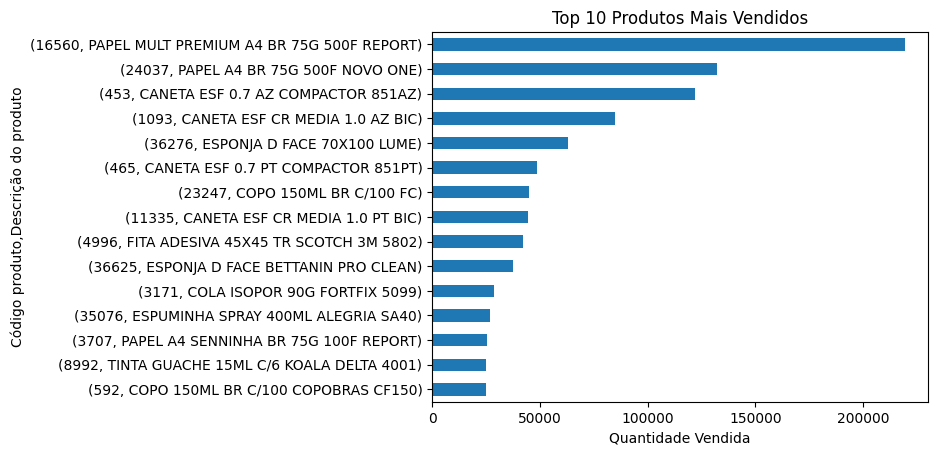

In [66]:
import matplotlib.pyplot as plt
produto_mais_vendidos = mais_vendidos.sort_values(ascending=False)
produto_mais_vendidos.head(15).plot(kind='barh', title='Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis()  # Inverte a ordem para exibir o maior no topo
plt.show()

In [67]:
# Os produtos com as maiores margens de lucro
base_notas["Margens"] = base_notas["Preço venda"] - base_notas["Preço de custo"]
lucro_por_produto = base_notas.groupby(['Código produto', 'Descrição do produto'])["Margens"].sum()
lucro_por_produto = lucro_por_produto.sort_values(ascending=False)
lucro_por_produto.head(20)

Código produto  Descrição do produto                    
16560           PAPEL MULT PREMIUM A4 BR 75G 500F REPORT    13993.85
34667           ORG GIRE TRAVE 297 PLASUTIL                  8128.61
32579           BOB TERMICA AM 48G 79X40 C/30 DML THEGA      4424.28
2127            PAPEL ESCOLAR A4 BR 200F 60KG MG             4165.81
26097           PAP TOALHA BR 2400F SUIFTPAPER               3136.15
30748           BOB TERMICA BR 80X40 C/30 CLEAR              2322.44
29588           DESINF HOSP ALCOOL 70° INPM 5L FACILITA      2201.03
2179            PAPEL ESCOLAR A4 BR 200F 40KG MG             1892.38
26562           POLASEAL A4 220X307X0.5 C/100 PROLAM         1888.47
27301           PAPEL CONTACT 45X25MX80MIC CR PLAVITEC       1866.02
7809            FILME PVC ESTIC 380X9X1000M AM DISPAFILM     1636.91
8888            FORM CONT RAZAO 80C 2V 3000F PRATIC 7622     1577.06
18839           CANETA ESF FINA 0.8 AZ C/100 BIC             1539.03
22853           POLASEAL A4 220X307X0.5 C/100 

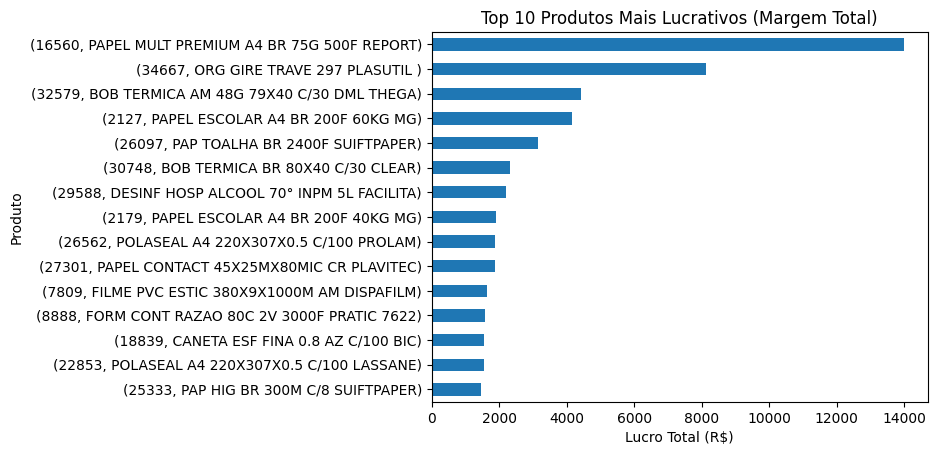

In [68]:
lucro_por_produto.head(15).plot(kind='barh', title='Top 10 Produtos Mais Lucrativos (Margem Total)')
plt.xlabel('Lucro Total (R$)')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Inverte a ordem para exibir o maior no topo
plt.show()

In [69]:
# tictk médio de cada produto
ticket_medio_por_produto = base_notas.groupby(['Código produto', 'Descrição do produto'])['Valor unitário'].mean()
ticket_medio_por_produto = ticket_medio_por_produto.sort_values(ascending=False)
print(ticket_medio_por_produto.head(20))

Código produto  Descrição do produto                    
36992           CANETA PENTONIC SORT C/400 CIS              1018.752222
33837           CJ P/COLETA SELETIVA 60L C/4 JSN             996.900000
34667           ORG GIRE TRAVE 297 PLASUTIL                  821.499273
33343           FEIRINHA FESTIV POTES DUO C/460 PLASUTIL     788.944000
20270           CARRO MULTIFUN C/BOLSA BETTANIN 9160         772.190000
36993           CANETA ESF BPX SORT C/400 CIS                730.654545
17975           ENCADERNADORA STAND 15F 54 FUR EXCENTRIX     684.768182
36613           NO BREAK BIV 115/220 1000VA TS SHARA         649.460000
20993           BALDE C/ESPREM C/DIV 33L BETTANIN 9077       618.098750
28730           PLASTIFICADORA COMPACT A3 MENNO 8372         592.815556
34507           GAZEBO X-FLEX OXFORD 3X3 AZ MOR              588.000000
26063           NO BREAK 220V 700VA SNB INTELBRAS            574.540000
23579           FRAGMENTADORA 8FLS 220V MENNO                565.428333
28173  

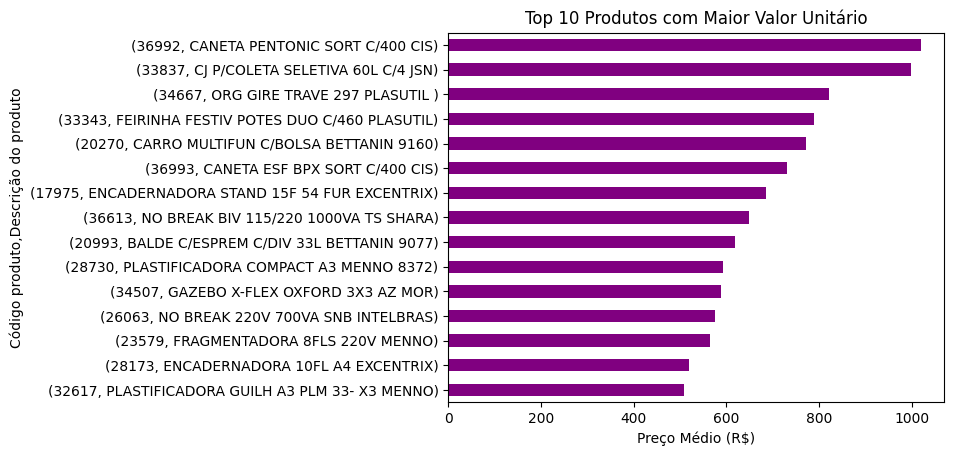

In [70]:
ticket_medio_por_produto.head(15).plot(kind='barh', color='purple', title='Top 10 Produtos com Maior Valor Unitário')
plt.xlabel('Preço Médio (R$)')
plt.gca().invert_yaxis()  # Inverte a ordem para exibir o maior no topo
plt.show()

In [73]:
print(base_notas['Código produto'].dtype)
print(base_estoque['Código Produto'].dtype)

int64
int64


In [74]:
base_estoque.columns.tolist()

['Código Produto',
 'Produto',
 'Código da Marca',
 'Marca',
 'Código da categoria',
 'Categoria',
 'Quantidade estoque',
 'Preço de custo']

In [75]:
base_notas.columns.tolist()

['Numero nota fiscal',
 'Data da venda',
 'Código produto',
 'Descrição do produto',
 'Quantidade do produto',
 'Valor unitário',
 'Preço venda',
 'Preço de custo',
 'Valor da nota',
 'Margens']

In [ ]:
# Passo 1: Padronizar os nomes das colunas
base_estoque = base_estoque.rename(columns={'Código Produto': 'Código produto'})  # Corrige possível erro de digitação

# Passo 2: Selecionar colunas relevantes do estoque
colunas_estoque = [
    'Código produto',  
    'Marca',
    'Categoria',
    'Quantidade estoque'
]

In [77]:
# Passo 3: Fazer o merge (junção)
df_vendas_enriquecido = pd.merge(
    base_notas,
    base_estoque[colunas_estoque],
    on='Código produto',  # Se as colunas tiverem o mesmo nome após renomear
    how='left'  # Mantém todas as vendas, mesmo sem registro no estoque
)

In [78]:
# Passo 4: Verificar resultados
print("\nAmostra dos dados enriquecidos:")
print(df_vendas_enriquecido[['Código produto', 'Descrição do produto', 'Marca', 'Categoria']].sample(5))

print("\nProdutos vendidos sem registro no estoque:")
print(df_vendas_enriquecido[df_vendas_enriquecido['Marca'].isna()]['Código produto'].unique())



Amostra dos dados enriquecidos:
        Código produto                     Descrição do produto  \
229832           36117  CAD CD POP FASHION FEM 20M 280F CREDEAL   
183686           29299        POTE CLIC QUAD 1.1L PLASUTIL 2765   
276678           16360           PAPEL CREPOM AZ ESC C/10 RIDET   
252716           23687          CLIPES GALV 2/0 C/720 CHAPARRAU   
35286            31493             ELASTICO Nº18 AM 500G REDBOR   

                                                   Marca             Categoria  
229832             NOVA CREDEAL INDUSTRIA DE CADERNOS SA      CADERNOS ( CAD )  
183686                                               NaN                   NaN  
276678  GLACE COMERCIO E BENEFICIAMENTO DE PAPEIS EIRELI  PAPEL CREPOM ( PAP )  
252716                INDUSTRIA E COMERCIO ONE-ROM LTDA.         CLIPS ( CLI )  
35286      FF COMERCIO DE MATERIAIS DE ESCRITORIO EIRELI     ELASTICOS ( ELA )  

Produtos vendidos sem registro no estoque:
[16560 23598 23603 35470 34658 236

In [79]:
df_vendas_enriquecido.head(10)

,Numero nota fiscal,Data da venda,Código produto,Descrição do produto,Quantidade do produto,Valor unitário,Preço venda,Preço de custo,Valor da nota,Margens,Marca,Categoria,Quantidade estoque
0,566082,2025-06-17,33932,ENV 229X324 OU C/100 FILIPERSON,2.0,33.00,27.48,24.41,3895.94,3.07,FILIPERSON NACIONAL REFL IND COMÉRCIO DE PAP E...,ENVELOPES ( ENV ),2076.0
1,566082,2025-06-17,29367,GUARDANAPO SNOB FS 33X30 50F SANTHER,5.0,2.90,2.50,2.23,3895.94,0.27,SANTHER FABRICA DE PAPEL SANTA THEREZINHA S/A,GUARDANAPOS ( GDP ),3475.0
2,566082,2025-06-17,241,PASTA AZ OF LE TIGRADA FRAMA 356-11952,40.0,9.45,8.86,7.61,3895.94,1.25,FRAMA INDUSTRIA GRAFICA LTDA,PASTAS ( PST ),2104.0
3,566082,2025-06-17,32608,CALCULADORA MESA 12 DIG MASTERPRINT 1086,6.0,20.87,18.97,17.05,3895.94,1.92,GRUPO MASTER COMERCIO IMPORTACAO E EXPORTACAO ...,CALCULADORAS ( CLC ),61.0
4,566082,2025-06-17,18508,CAD BROCH UNIV STIFF AZ 96F JANDAIA,5.0,6.26,5.68,4.83,3895.94,0.85,BIGNARDI IND.E COM.DE PAP E ARTEFAT LTDA,CADERNOS ( CAD ),1910.0
5,566082,2025-06-17,25261,MARC QUADRO BR AZ BRW CA3001,36.0,1.60,1.33,1.17,3895.94,0.16,BRW SUPRIMENTOS ESCOLARES E ESCRITORIO LTDA.,MARCADORES ( MRC ),352.0
6,566082,2025-06-17,22711,TESOURA ACO INOX 21CM BRW TE2101,4.0,4.03,3.50,3.11,3895.94,0.39,BRW SUPRIMENTOS ESCOLARES E ESCRITORIO LTDA.,TESOURAS ( TES ),89.0
7,566082,2025-06-17,25495,MARCA TEXTO AM C/12 MASTERPRINT MP612,2.0,11.30,9.69,8.72,3895.94,0.97,GRUPO MASTER COMERCIO IMPORTACAO E EXPORTACAO ...,MARCA TEXTO ( MRT),293.0
8,566082,2025-06-17,23502,COLA EVA S/TOLUENO 75G BRASCOLA,1.0,5.20,4.45,3.94,3895.94,0.51,BRASCOLA LTDA,COLAS ( COL ),460.0
9,566082,2025-06-17,23717,PERFURADOR 2F 35FL METAL BRW PF3000,2.0,42.00,34.96,32.40,3895.94,2.56,BRW SUPRIMENTOS ESCOLARES E ESCRITORIO LTDA.,PERFURADORES ( PRF ),394.0


In [80]:
df_vendas_enriquecido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327203 entries, 0 to 327202
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Numero nota fiscal     327203 non-null  int64         
 1   Data da venda          327203 non-null  datetime64[ns]
 2   Código produto         327203 non-null  int64         
 3   Descrição do produto   327203 non-null  object        
 4   Quantidade do produto  327203 non-null  float64       
 5   Valor unitário         327203 non-null  float64       
 6   Preço venda            327203 non-null  float64       
 7   Preço de custo         327203 non-null  float64       
 8   Valor da nota          327203 non-null  float64       
 9   Margens                327203 non-null  float64       
 10  Marca                  301937 non-null  object        
 11  Categoria              301937 non-null  object        
 12  Quantidade estoque     301937 non-null  floa